In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
title_basics = pd.read_csv('./Data/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv("./Data/imdb.title.ratings.csv.gz")
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv.gz')

In [6]:
title_basics.rename(columns = {'primary_title':'movie'}, inplace = True)
title_basics.drop(columns = ["original_title","runtime_minutes"], inplace=True)

In [7]:
title_basics['genres'].isna().sum()/146144*100

3.7004598204510617

In [8]:
title_basics.dropna(subset= ['genres'], inplace = True)

In [9]:
#movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [10]:
movie_budgets["release_year"]= [x[7:] for x in movie_budgets["release_date"]]
movie_budgets["release_month"]= [x[:4] for x in movie_budgets["release_date"]]

#for the purpose of graphing, edited each month with numeric values in the beginning 
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jan", "01 Jan")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Feb", "02 Feb")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Mar", "03 Mar")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Apr", "04 Apr")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("May", "05 May")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jun", "06 Jun")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Jul", "07 Jul")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Aug", "08 Aug")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Sep", "09 Sep")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Oct", "10 Oct")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Nov", "11 Nov")
movie_budgets["release_month"] = movie_budgets["release_month"].str.replace("Dec", "12 Dec")

In [11]:
# change production_budget, domestic_gross, and worldwide_budget to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
movie_budgets.drop(columns = ["id"], inplace=True)
# drop rows where worldwide_gross or production_budget is 0
movie_budgets = movie_budgets[movie_budgets.worldwide_gross != 0]
movie_budgets = movie_budgets[movie_budgets.production_budget != 0]

In [13]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets['profit_million']=(movie_budgets['profit']/1000000)
movie_budgets['production_budget_million']=(movie_budgets['production_budget']/1000000)
movie_budgets['ROI'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100
movie_budgets = movie_budgets.round({'ROI': 2})
movie_budgets['year'] = pd.DatetimeIndex(movie_budgets['release_date']).year

In [14]:
movie_budgets.loc[movie_budgets['movie']== 'The Gambler']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year
2224,"Dec 10, 2014",The Gambler,25000000.0,33680992.0,38718031.0,2014,12 Dec,13718031.0,13.718031,25.0,54.87,2014
4749,"Aug 4, 1999",The Gambler,3000000.0,51773.0,101773.0,1999,08 Aug,-2898227.0,-2.898227,3.0,-96.61,1999


# Merge Data Tables 

In [15]:
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data
#imdb_data.loc[imdb_data['movie']== 'The Gambler']

,tconst,movie,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,2019,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,2019,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73050,tt9914642,Albatross,2017,Documentary,8.5,8


In [16]:
mdf = pd.merge(imdb_data, movie_budgets, how = 'inner', on = 'movie')
mdf
#mdf.loc[mdf['movie']== 'The Gambler']

,tconst,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",45000000.0,0.0,73706.0,2012,12 Dec,-44926294.0,-44.926294,45.000,-99.84,2012
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",25000000.0,720828.0,9313302.0,2013,03 Mar,-15686698.0,-15.686698,25.000,-62.75,2013
2,tt4339118,On the Road,2014,Drama,6.0,6,"Mar 22, 2013",25000000.0,720828.0,9313302.0,2013,03 Mar,-15686698.0,-15.686698,25.000,-62.75,2013
3,tt5647250,On the Road,2016,Drama,5.7,127,"Mar 22, 2013",25000000.0,720828.0,9313302.0,2013,03 Mar,-15686698.0,-15.686698,25.000,-62.75,2013
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",91000000.0,58236838.0,187861183.0,2013,12 Dec,96861183.0,96.861183,91.000,106.44,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,tt8680254,Richard III,2016,Drama,9.1,28,"Dec 29, 1995",9200000.0,2684904.0,4199334.0,1995,12 Dec,-5000666.0,-5.000666,9.200,-54.36,1995
2588,tt8824064,Heroes,2019,Documentary,7.3,7,"Oct 24, 2008",400000.0,655538.0,655538.0,2008,10 Oct,255538.0,0.255538,0.400,63.88,2008
2589,tt8976772,Push,2019,Documentary,7.3,33,"Feb 6, 2009",38000000.0,31811527.0,49678401.0,2009,02 Feb,11678401.0,11.678401,38.000,30.73,2009
2590,tt9024106,Unplanned,2019,"Biography,Drama",6.3,5945,"Mar 29, 2019",6000000.0,18107621.0,18107621.0,2019,03 Mar,12107621.0,12.107621,6.000,201.79,2019


In [17]:
mdf=mdf.sort_values(by='numvotes', ascending = False)
#mdf.loc[mdf['movie']== 'The Gambler']

In [18]:
mdf['same_year']= mdf['start_year']-mdf['year']
mdf = mdf.loc[mdf['same_year']== 0]
#mdf.loc[mdf['movie']== 'The Gambler']

In [19]:
mdf = mdf.drop_duplicates(subset='movie')
mdf.drop(columns = ["tconst"], inplace=True)

In [20]:
mdf["genres"] = mdf["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [21]:
# filter for movies released after 1990 
mdf = mdf.loc[mdf['year'] >= 2010]

In [42]:
mdf2.loc[mdf2["movie"] == "The Devil Inside"]

,movie,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,profit_million,production_budget_million,ROI,year,same_year
782,The Devil Inside,2012,Horror,4.2,33522,"Jan 6, 2012",1000000.0,53262945.0,101759490.0,2012,01 Jan,100759490.0,100.75949,1.0,10075.95,2012,0


In [67]:
mdf2 = mdf.explode('genres')
mdf2_no_gallow = mdf2.drop(index = 1722).sort_values(by="ROI",ascending = False)

In [68]:
mdf2_no_gallow_no_devil_inside = mdf2_no_gallow.drop(index = 782).sort_values(by="ROI",ascending = False)

In [69]:
mdf2_no_gallow_no_devil_inside_positive = mdf2_no_gallow[mdf2_no_gallow["ROI"]>0]

In [114]:
mdf2_no_gallow_no_devil_inside_positive.shape

(2690, 17)

In [71]:
mdf2_no_gallow_no_devil_inside_positive["ROI"].mean()

363.06231970260126

In [73]:
top_three_list = ["Horror", "Mystery", "Thriller"]
mdf2_top_three = mdf2_no_gallow_no_devil_inside_positive.loc[mdf2_no_gallow_no_devil_inside_positive['genres'].isin(top_three_list)] 
mean_ROI_by_month = mdf2_top_three.groupby("release_month").mean()

In [ ]:
mdf2['ROI'].sort_values( ascending = False)
mdf2.drop(index =1722)

In [ ]:
sorted_genres = mdf2.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top5genres = list(sorted_genres['genres'].values[0:5])
top5genres

In [ ]:
sorted_genres.shape

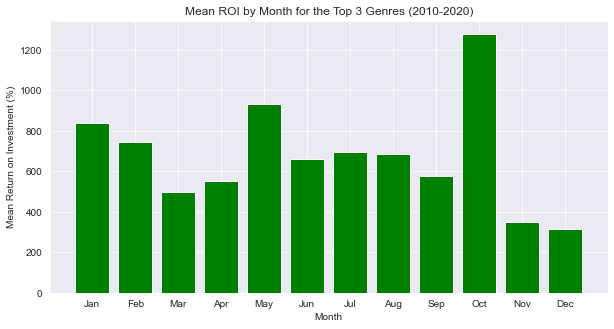

In [82]:
height = mean_ROI_by_month['ROI']
x = range(12)
labels = ["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Month for the Top 3 Genres (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month")
plt.savefig('Mean ROI by Month for the Top 3 Genres.png');

In [102]:
mdf2_Horror = mdf2[mdf2["genres"]== "Horror"]
mdf2_Mystery = mdf2[mdf2["genres"]== "Mystery"]
mdf2_Thriller = mdf2[mdf2["genres"]== "Thriller"]

In [103]:
mdf2_Horror.groupby("genres").mean()
mdf2_Mystery.groupby("genres").mean()
mdf2_Thriller.groupby("genres").mean()

,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year,same_year
genres,,,,,,,,,,,,
Thriller,2013.758621,6.12069,132757.047414,3.553324e+07,4.913053e+07,1.275816e+08,9.204832e+07,92.048323,35.533244,597.271983,2013.758621,0.0


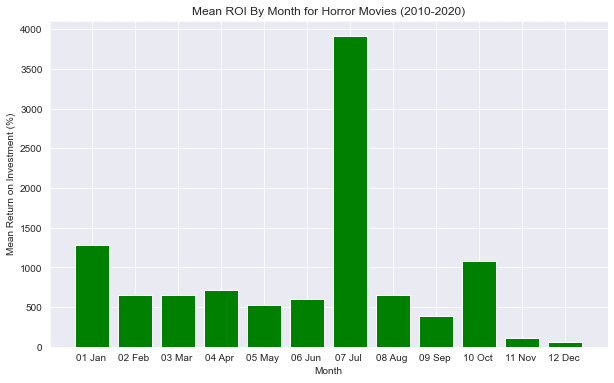

In [104]:
mdf2_Horror_Grouped = mdf2_Horror.groupby(["release_month"], as_index=False).mean()
mdf2_Horror_Grouped = mdf2_Horror_Grouped.set_index("release_month")

height = mdf2_Horror_Grouped['ROI']
x = range(12)
labels = mdf2_Horror_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Horror Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-105-e58f04b45267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Horror['converted'] = pd.to_datetime(pd.Series(mdf2_Horror["release_date"]))
<ipython-input-105-e58f04b45267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Horror["day of the week"] = mdf2_Horror["converted"].dt.day_name()


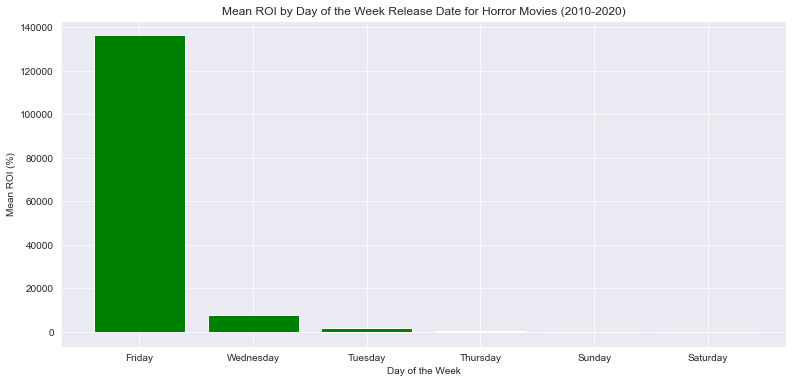

In [105]:
mdf2_Horror['converted'] = pd.to_datetime(pd.Series(mdf2_Horror["release_date"]))
mdf2_Horror["day of the week"] = mdf2_Horror["converted"].dt.day_name()
mdf2_Horror_WeekName = mdf2_Horror.groupby("day of the week").sum()
mdf2_Horror_WeekName = mdf2_Horror_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Horror_WeekName['ROI']
x = range(6)
labels = mdf2_Horror_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Horror Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");


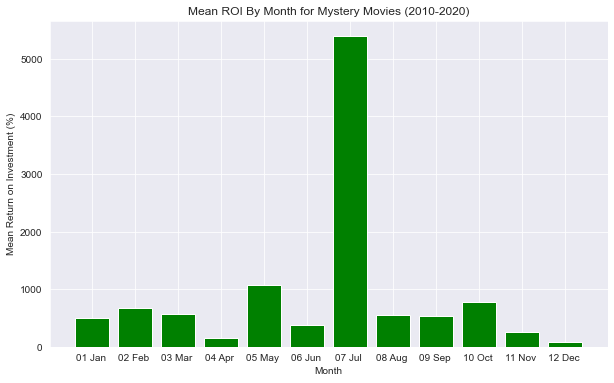

In [106]:
mdf2_Mystery_Grouped = mdf2_Mystery.groupby(["release_month"], as_index=False).mean()
mdf2_Mystery_Grouped = mdf2_Mystery_Grouped.set_index("release_month")

height = mdf2_Mystery_Grouped['ROI']
x = range(12)
labels = mdf2_Mystery_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Mystery Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-107-056b21c98626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Mystery['converted'] = pd.to_datetime(pd.Series(mdf2_Mystery["release_date"]))
<ipython-input-107-056b21c98626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Mystery["day of the week"] = mdf2_Mystery["converted"].dt.day_name()


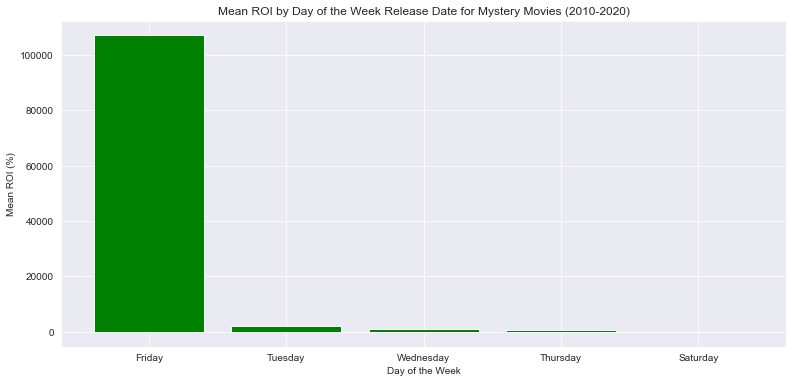

In [107]:
mdf2_Mystery['converted'] = pd.to_datetime(pd.Series(mdf2_Mystery["release_date"]))
mdf2_Mystery["day of the week"] = mdf2_Mystery["converted"].dt.day_name()
mdf2_Mystery_WeekName = mdf2_Mystery.groupby("day of the week").sum()
mdf2_Mystery_WeekName = mdf2_Mystery_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Mystery_WeekName['ROI']
x = range(5)
labels = mdf2_Mystery_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Mystery Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");

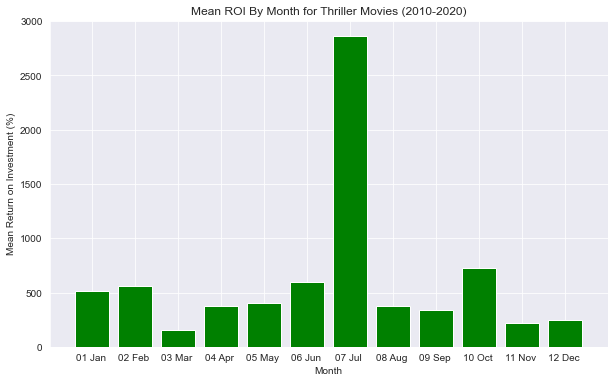

In [108]:
mdf2_Thriller_Grouped = mdf2_Thriller.groupby(["release_month"], as_index=False).mean()
mdf2_Thriller_Grouped = mdf2_Thriller_Grouped.set_index("release_month")

height = mdf2_Thriller_Grouped['ROI']
x = range(12)
labels = mdf2_Thriller_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Thriller Movies (2010-2020)")
ax.set_ylabel("Mean Return on Investment (%)")
ax.set_xlabel("Month");

<ipython-input-109-3cbaab2053c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Thriller['converted'] = pd.to_datetime(pd.Series(mdf2_Thriller["release_date"]))
<ipython-input-109-3cbaab2053c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf2_Thriller["day of the week"] = mdf2_Thriller["converted"].dt.day_name()


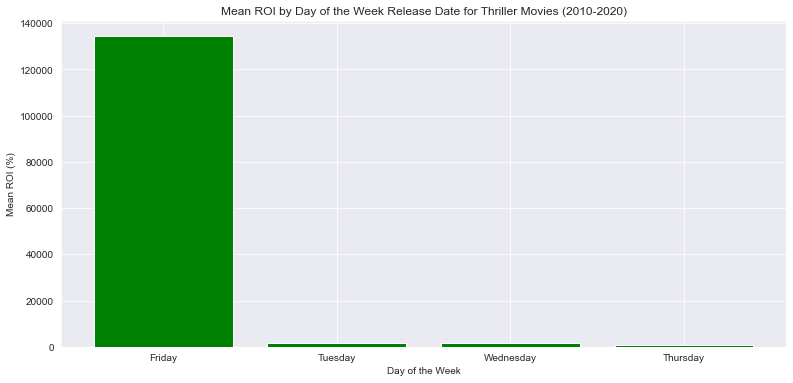

In [109]:
mdf2_Thriller['converted'] = pd.to_datetime(pd.Series(mdf2_Thriller["release_date"]))
mdf2_Thriller["day of the week"] = mdf2_Thriller["converted"].dt.day_name()
mdf2_Thriller_WeekName = mdf2_Thriller.groupby("day of the week").sum()
mdf2_Thriller_WeekName = mdf2_Thriller_WeekName.sort_values("ROI", ascending=False)

height = mdf2_Thriller_WeekName['ROI']
x = range(4)
labels = mdf2_Thriller_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Thriller Movies (2010-2020)")
ax.set_ylabel("Mean ROI (%)")
ax.set_xlabel("Day of the Week");